In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.integrate import solve_ivp

from models import *

%load_ext autoreload
%autoreload 2

# Part 1: Interpolation approach

Create interpolation approach. Simulate using the interpolation approach. Similar to Ogunbanwo 2018 but using higher order integrator.

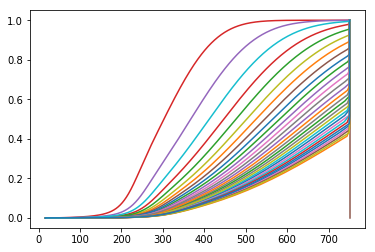

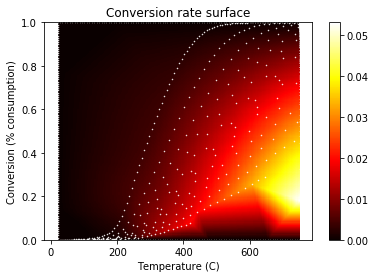

In [3]:
# Load data and interpolation function
nainterp = NonArrheniusInterp('synthetic', '25Cstart')

# nainterp.plot_consumption_curves()
nainterp.print_surf_plot()

In [ ]:
# Print surface plots for batch of datasets
fig_dir = '/Users/timanderson/Documents/Research/Kinetics/Manuscripts/NAMLA/temp_conversion_plots/'
# dataset_names = ['chichimene', 'tekel', 'utsil', 'xinjiang']
dataset_names = ['chichimene']
experiment_names = ['0 PSI']

for d in dataset_names:
    
    dirname = 'datasets/'+d
    experiment_names = [name for name in os.listdir(dirname) if os.path.isdir(os.path.join(dirname, name))]

    for exp in experiment_names:
        data_cell = NonArrheniusBase(d, exp)
        # data_cell.plot_consumption_curves()
        data_cell.print_surf_plot()

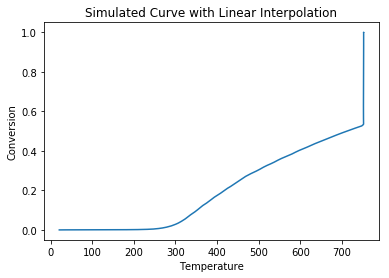

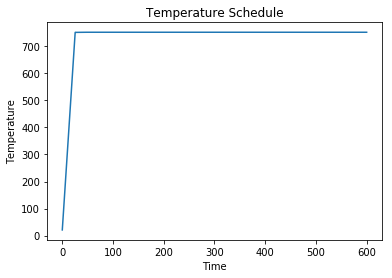

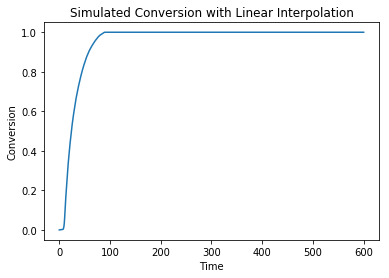

In [55]:
# Integrate using interpolation-based method

tspan = (0.0, 600.0)
y0 = np.array([21.0, 0])
fun = nainterp.get_sim_func(29.0)
sol = solve_ivp(fun, tspan, y0,method='BDF')
plt.figure()
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel('Temperature')
plt.ylabel('Conversion')
plt.title('Simulated Curve with Linear Interpolation')
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[0,:])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Schedule')
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[1,:])
plt.xlabel('Time')
plt.ylabel('Conversion')
plt.title('Simulated Conversion with Linear Interpolation')
plt.show()

# Part 2: Machine learning approach

Simulation using machine learning-based approach to interpolation. Algorithm using locally-weighted linear regression to predict and quantify uncertainty in the value of the conversion rate. 

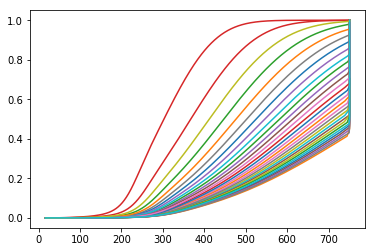

In [7]:
# Load data and interpolation function
naml = NonArrheniusML('synthetic', '25Cstart')

/Users/timanderson/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


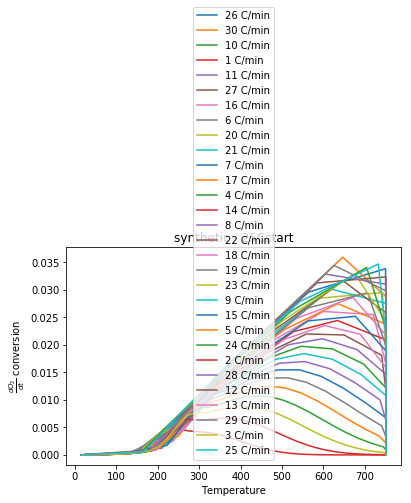

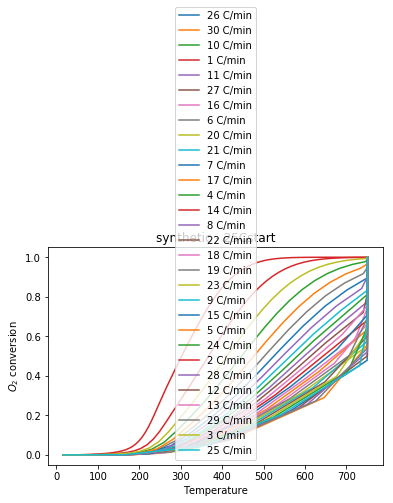

In [8]:
naml.print_consumption_curves()

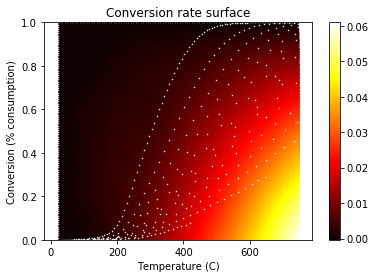

In [11]:
naml.print_surf_plot()

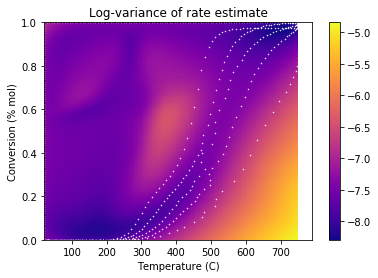

In [4]:
naml.print_uncertainty_surf()

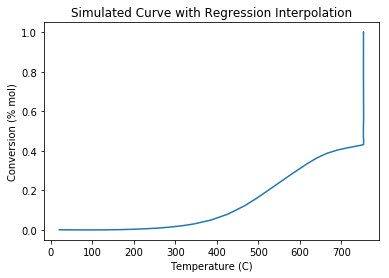

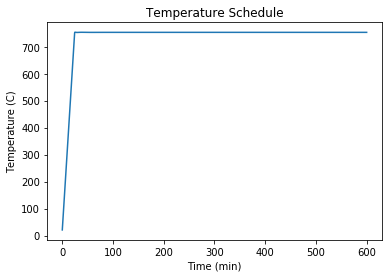

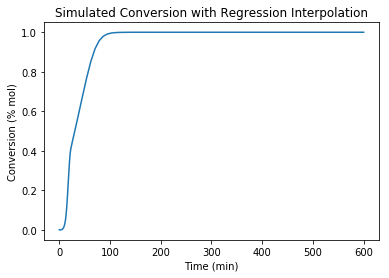

In [15]:
# Integrate using ML method

tspan = (0.0, 600.0)
y0 = np.array([21.0, 0.0])
fun = naml.get_sim_func(30.0)
sol = solve_ivp(fun, tspan, y0, method='BDF')
plt.figure()
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel('Temperature (C)')
plt.ylabel('Conversion (% mol)')
plt.title('Simulated Curve with Regression Interpolation')
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[0,:])
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Schedule')
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[1,:])
plt.xlabel('Time (min)')
plt.ylabel('Conversion (% mol)')
plt.title('Simulated Conversion with Regression Interpolation')
plt.show()

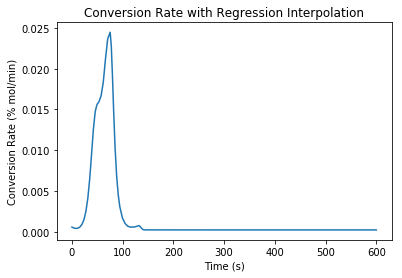

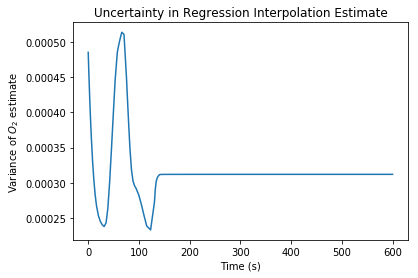

In [119]:
dXdt, sigmas = naml.get_rate_and_var(sol.y[0,:], sol.y[1,:])

plt.figure()
plt.plot(sol.t, dXdt)
plt.xlabel('Time (s)')
plt.ylabel('Conversion Rate (% mol/min)')
plt.title('Conversion Rate with Regression Interpolation')
plt.show()

plt.figure()
plt.plot(sol.t, sigmas)
plt.xlabel('Time (s)')
plt.ylabel(r'Variance of $O_2$ estimate')
plt.title('Uncertainty in Regression Interpolation Estimate')
plt.show()

## Paper ideas

* Compare across experiments/samples
* Compare across different pressures
* (maybe) designing optimal heating curves for RTO experiments
* Make synthetic models + data to illustrate method (before getting to experimental results)
* Embed ML lookup in IMPECT simulator - use total carbon oxides 